In [7]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import numpy as num
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [8]:
def gen_data_classification(r_min,r_max,c_dist1,c_dist2,n_points,noise_lev):
    c_x1=c_dist1/2*num.cos(num.pi/4)
    c_y1=c_dist1/2*num.sin(num.pi/4)
    c_x2=c_dist2/2*num.cos(num.pi/4)
    c_y2=c_dist2/2*num.sin(num.pi/4)
    X_cls0, Y_cls0=gen_data_circle(-c_x1, -c_y1,r_min,r_max,n_points,noise_lev,0)
    X_cls1, Y_cls1=gen_data_circle(c_x1, c_y1,r_min,r_max,n_points,noise_lev,1)
    X_cls2, Y_cls2=gen_data_circle(-c_x2, c_y2,r_min,r_max,n_points,noise_lev,2)
    X_cls3, Y_cls3=gen_data_circle(c_x2, -c_y2,r_min,r_max,n_points,noise_lev,3)
    X_clsA, Y_clsA=gen_data_class(X_cls0,Y_cls0,X_cls1,Y_cls1)
    X_clsB, Y_clsB=gen_data_class(X_cls2,Y_cls2,X_cls3,Y_cls3)
    X_cls, Y_cls=gen_data_class(X_clsA,Y_clsA,X_clsB,Y_clsB)
    return X_cls, Y_cls

def gen_data_class(X_cls1,Y_cls1,X_cls0,Y_cls0):
    X_cls=num.hstack((X_cls0,X_cls1))
    Y_cls=num.hstack((Y_cls0,Y_cls1))
    return X_cls, Y_cls

def gen_data_circle(c_x, c_y,r_min,r_max,n_points,noise_lev,cls=0):
    radius=r_min+num.random.rand(n_points)*(r_max-r_min)
    theta=num.random.rand(n_points)*(2*num.pi)
    x_obs=c_x+radius*num.cos(theta)
    y_obs=c_y+radius*num.sin(theta)
    x_obs=x_obs+gen_uncert(x_obs,noise_lev)
    y_obs=y_obs+gen_uncert(y_obs,noise_lev)
    X_obs=num.stack((x_obs,y_obs))
    if cls==0:
        Y_obs=num.ones(num.size(y_obs),dtype=int)
    else:
        Y_obs=num.zeros(num.size(y_obs),dtype=int)
    return X_obs, Y_obs

def gen_uncert(xy_obs,noise_lev):
    dn=noise_lev*((2*num.random.rand(num.size(xy_obs))-1)*num.mean(num.abs(xy_obs)))
    return dn

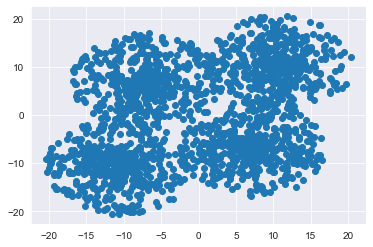

In [9]:
r_min=0
r_max=10
c_dist1=30
c_dist2=20
n_points=500
noise_lev=0.
X_cls, Y_cls=gen_data_classification(r_min,r_max,c_dist1,c_dist2,n_points,noise_lev)
plt.scatter(X_cls[0,:],X_cls[1,:])

array([3, 3, 3, ..., 0, 0, 0])

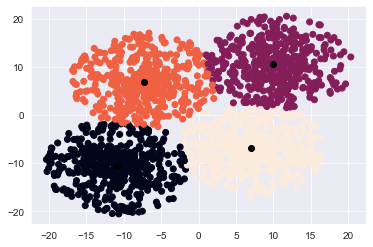

In [12]:
kmeans = KMeans(n_clusters=4).fit(X_cls.T)
y_kmeans = kmeans.predict(X_cls.T)
labels=kmeans.labels_


#plt.scatter(X_cls[0,:], X_cls[1,:], c=y_kmeans)
plt.scatter(X_cls[0,:], X_cls[1,:], c=labels)
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')


9


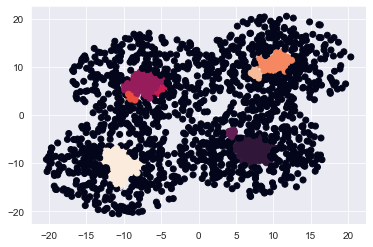

In [11]:
db = DBSCAN(eps=0.8, min_samples=10).fit(X_cls.T)
labels = db.labels_

no_clusters = len(num.unique(labels) )
no_noise = num.sum(num.array(labels) == -1, axis=0)
print(no_clusters)

plt.scatter(X_cls[0,:], X_cls[1,:], c=labels)

In [33]:
ix = (y_kmeans==2)
clust2 = X_cls[:, ix]
y_kmeans

array([0, 0, 0, ..., 2, 2, 2])

(-15.0, 15.0)

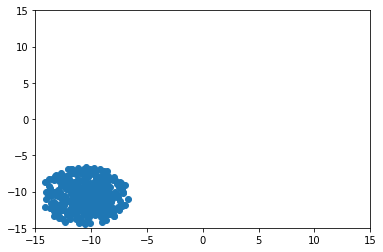

In [32]:
plt.scatter(clust2[0,:], clust2[1,:])
plt.xlim([-15, 15])
plt.ylim([-15, 15])